In [2]:
#정규방정식
import numpy as np

X=2*np.random.rand(100,1)
y=4+3 * X + np.random.randn(100,1)

In [3]:
#정규방정식을 이용
X_b= np.c_[np.ones((100,1)),X] #모든 샘플에 x0 = 1 을 추가한다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
#inv() 함수는 역행렬을 계산, dot() 메서드는 행렬 곱셈

In [4]:
theta_best #정규방정식으로 계산한 값 확인하기

array([[4.07268692],
       [2.92416151]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #모든 샘플에 x0 =1 을 추가한다
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07268692],
       [9.92100995]])

In [6]:
#모델의 예측 그래프
from matplotlib import pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.07268692]), array([[2.92416151]]))

In [8]:
lin_reg.predict(X_new)

array([[4.07268692],
       [9.92100995]])

In [9]:
#배치경사하강법
from numpy.random import randn
eta= 0.1 #학습률
n_iterations=1000
m = 100

theta = np.random.randn(2,1) #무작위로 초기화

for iteration in randn(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.07268692],
       [2.92416151]])

In [11]:
#확률적 경사 하강법
n_epochs = 50
t0,t1 = 5, 50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi= X_b[random_index:random_index+1]
        yi= y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[4.0800116 ],
       [2.92429924]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

C:\Users\TAEOK\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [15]:
sgd_reg,sgd_reg.coef_

(SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
        fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
        loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
        power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
        warm_start=False), array([2.99494338]))

In [16]:
#다항 회귀
m= 100
X= 6 * np.random.rand(m,1) - 3
y= 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.55515109])

In [18]:
X_poly[0]

array([1.55515109, 2.41849492])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_,lin_reg.coef_

(array([2.04754522]), array([[0.94684403, 0.52508345]]))

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="훈련세트")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="검증세트")

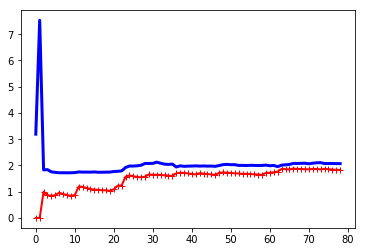

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

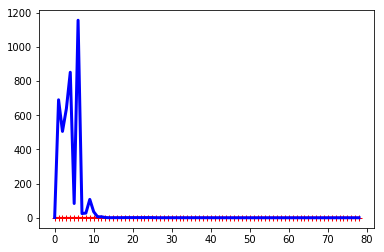

In [22]:
#학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])

plot_learning_curves(polynomial_regression,X,y)

In [23]:
#규제가 있는 선형 모델
#릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.31895803]])

In [25]:
sgd_reg = SGDRegressor(max_iter=5,penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.17065298])

In [25]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.01270748])

In [26]:
#엘라스틱넷
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.01487612])

In [27]:
#조기종료
from sklearn.base import clone

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler()) ])
X_train_poly_scaled= poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter=1,warm_start=True,penalty=None,
                       learning_rate="constant",eta0=0.0005)

minimum_val_error= float("inf")
best_epoch = None
best_model= None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train) #훈련을 이어서 진행한다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model= clone(sgd_reg)

NameError: name 'StandardScaler' is not defined

In [28]:
#로지스틱 회귀
#결정 경계 : 붓 꽃 데이터 셋을 이용
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [29]:
X = iris["data"][:,3:] #꽃의 너비
y = (iris["target"]==2).astype(np.int) #1 iris-Virginica 면 1, 그렇지 않으면 0

In [30]:
#로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

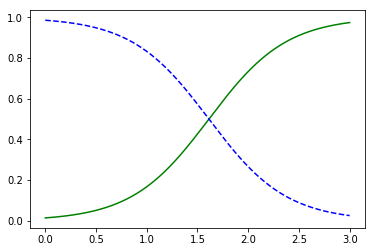

In [31]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0],"b--",label="Iris-Virginica 아님")
# 다음은 이미지를 미려하게 출력 하기 위한 맷플롯립 코드가 이어진다.

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [33]:
#소프트맥스 회귀
X=iris["data"][:,(2,3)]
y=iris["target"]
softmax_reg = LogisticRegression(multi_class ="multinomial",solver="lbfgs")
softmax_reg.fit(X,y)
softmax_reg.predict([[5,2]])

array([2])

In [34]:
softmax_reg.predict_proba([[5,2]])

array([[2.42794737e-04, 2.14966717e-01, 7.84790488e-01]])